<a href="https://colab.research.google.com/github/Muskan786786/TSF_Task2/blob/master/TSF_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data is imported successfully")

Data is imported successfully


In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


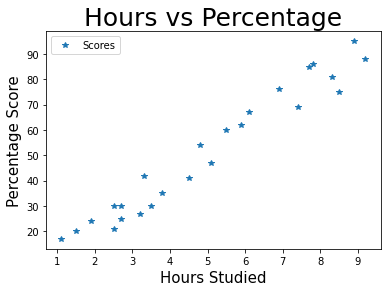

In [7]:
data.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage', fontsize=25)
plt.xlabel('Hours Studied', fontsize=15)
plt.ylabel('Percentage Score', fontsize=15)
plt.show()

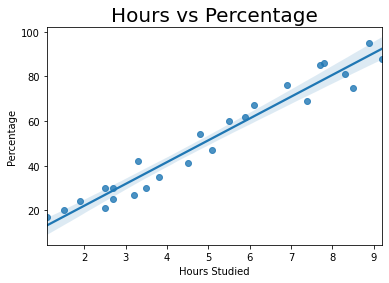

In [9]:
sns.regplot(x='Hours', y='Scores',data=data)
plt.title("Hours vs Percentage", fontsize=20)
plt.xlabel("Hours Studied", fontsize=10)
plt.ylabel("Percentage", fontsize=10)
plt.show()

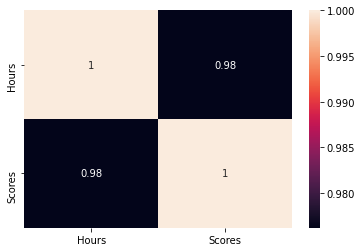

In [11]:
sns.heatmap(data.corr(), annot=True)

In [34]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [15]:
display(x,y)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [70]:
y_test.shape

(5,)

In [71]:
x_test.shape

(5, 1)

In [72]:
y_train.shape

(20,)

In [73]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression().fit(x_train, y_train)
n = regressor.coef_
c = regressor.intercept_
print("Training complete.")

Training complete.


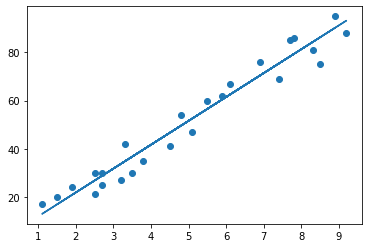

In [74]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

In [75]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [76]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [77]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [78]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [79]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
